# County OUTPUTS

Using Python 3.4

In [205]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import geopandas as gp
from shapely.geometry import Point
import os
from ipywidgets import *
from IPython.display import display
import pyepsg
import numpy as np

%matplotlib inline
print (folium.__version__)

0.3.0


In [555]:
path = '../Outputs'
files = sorted([f for f in os.listdir(path) if f.endswith('.csv')])

file_chooser = Dropdown(
    options=files
)
display(file_chooser)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [576]:
df = pd.read_csv("../Outputs/" + file_chooser.value)

In [577]:
df.columns

Index(['Unnamed: 0', 'assessment_get', 'assistance_get', 'claim_get',
       'damage_state', 'damage_state_start', 'damage_value',
       'damage_value_start', 'gave_up_home_search', 'gave_up_money_search',
       'home_get', 'inspection_get', 'latitude', 'loan_get', 'longitude',
       'permit_get', 'story'],
      dtype='object')

In [578]:
county_outline = gp.read_file('/Users/geomando/Dropbox/PacificCounty/GIS/County_Outline.shp')
blocks = gp.read_file('/Users/geomando/Dropbox/PacificCounty/GIS/Census_Blocks_2000.shp')
blocks['AREA'] = blocks.area
blocks['POP_DENS'] = pd.to_numeric(blocks.TOT_POP) / blocks.AREA

In [579]:
county_outline.to_crs(epsg='4326', inplace=True)
blocks.to_crs(epsg='4326', inplace=True)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gp.GeoDataFrame(df, geometry=geometry)
gdf.crs = {'init': 'epsg:4326'}
gdf.to_crs(crs=county_outline.crs, inplace=True)

In [580]:
blocks_pts = gp.sjoin(gdf, blocks, how="inner", op='intersects')
blocks_pts['num_points'] = np.ones(len(blocks_pts))

blocks_pts_gp = blocks_pts.drop(['latitude', 'longitude', 'AIANHH00', 'AIR_NAME',
       'ASIAN', 'BLACK', 'BLOCK', 'BLOCK00L', 'BLOCK_',
       'CENSUS_PL', 'CORRECT', 'COUNTY_1', 'DORMS', 'District', 'HAWAIIAN',
       'HISPANIC', 'HOUSESQMI', 'HOUSE_UNIT', 'HOUSING', 'INDIAN', 'INMATES',
       'MILITARY', 'NON_INST', 'NO_H_2', 'NO_H_AS', 'NO_H_BLK', 'NO_H_HAW',
       'NO_H_IND', 'NO_H_OTHER', 'NO_H_WT', 'NURSING', 'OCCUPIED', 'OCCUPIED2',
       'ONE_RACE', 'OTHER', 'OTHER_IN', 'OTH_NO_IN', 'OWNER_OCC', 'OWN_OCC2',
       'PERSONSQMI', 'PLACE00', 'P_OCCUPIED', 'RENTER2', 'RENTERS', 'SCHOOL_',
       'SDUNI', 'SQ_MILES', 'STATE_1', 'TOT_GROUP', 'TOT_HO2', 'TOT_POP',
       'TOT_POP2', 'TRACT', 'TRACT_ID', 'VACANT', 'VACANT2', 'WHITE', 'Z_POP',
       'AREA', 'POP_DENS'], axis=1).groupby('BLOCK_ID')



blocks_pts_gp_mean = blocks_pts_gp.mean()
blocks_pts_gp_mean.reset_index(inplace=True)
blocks_pts_mean_joined = blocks.merge(blocks_pts_gp_mean, on='BLOCK_ID')

blocks_pts_gp_sum = blocks_pts_gp.sum()
blocks_pts_gp_sum.reset_index(inplace=True)
blocks_pts_sum_joined = blocks.merge(blocks_pts_gp_sum, on='BLOCK_ID')

In [561]:
# num_houses = blocks_pts_sum_joined[['BLOCK_ID','geometry', 'num_points']].dropna(axis=0, how='any')

# f, ax = plt.subplots(1, figsize=(10, 10))
# ax.set_aspect('equal')

# county_outline.plot(ax=ax, color = 'white')
# gdf.plot(ax=ax)

# ax.set_title('Location of Homes Analyzed')

# fname = "../Outputs/" + file_chooser.value + '-map-homesloc.png'
# f.savefig(filename=fname, dpi=150, format='png',
#         transparent=False, bbox_inches='tight')

In [562]:
# num_houses = blocks_pts_sum_joined[['BLOCK_ID','geometry', 'num_points']].dropna(axis=0, how='any')


# f, ax = plt.subplots(1, figsize=(10, 10))
# ax.set_aspect('equal')

# county_outline.plot(ax=ax, color = 'white')
# num_houses.plot(column='num_points', cmap=plt.cm.Greens, scheme='fisher_jenks', legend=True, categorical=False, ax=ax)

# ax.set_title('Number of Homes Analyzed')

# fname = "../Outputs/" + file_chooser.value + '-map-homes.png'
# f.savefig(filename=fname, dpi=150, format='png',
#         transparent=False, bbox_inches='tight')

In [563]:
# damage_value = blocks_pts_sum_joined[['BLOCK_ID','geometry', 'damage_value_start']].dropna(axis=0, how='any')


# f, ax = plt.subplots(1, figsize=(10, 10))
# ax.set_aspect('equal')

# county_outline.plot(ax=ax, color = 'white')
# damage_value.plot(column='damage_value_start', cmap=plt.cm.Reds, scheme='fisher_jenks', legend=True, categorical=False, ax=ax)

# ax.set_title('Total Value of Shaking-Induced Home Damage ($)')

# fname = "../Outputs/" + file_chooser.value + '-map-damage.png'
# f.savefig(filename=fname, dpi=150, format='png',
#         transparent=False, bbox_inches='tight')

In [564]:
# money_gaveup = blocks_pts_sum_joined[['BLOCK_ID','geometry', 'gave_up_money_search', 
#                                       'num_points']].dropna(axis=0, how='any')
# money_gaveup['percent_gaveup'] = 100.0*(money_gaveup['gave_up_money_search'] / money_gaveup['num_points'] )

# f, ax = plt.subplots(1, figsize=(10, 10))
# ax.set_aspect('equal')

# county_outline.plot(ax=ax, color = 'white')
# money_gaveup.plot(column='percent_gaveup', cmap=plt.cm.Purples, scheme='fisher_jenks', legend=True, categorical=False, ax=ax)

# ax.set_title('Percent Households Gave Up Search for Financial Assistance')

# fname = "../Outputs/" + file_chooser.value + '-map-money-gaveup.png'
# f.savefig(filename=fname, dpi=150, format='png',
#         transparent=False, bbox_inches='tight')

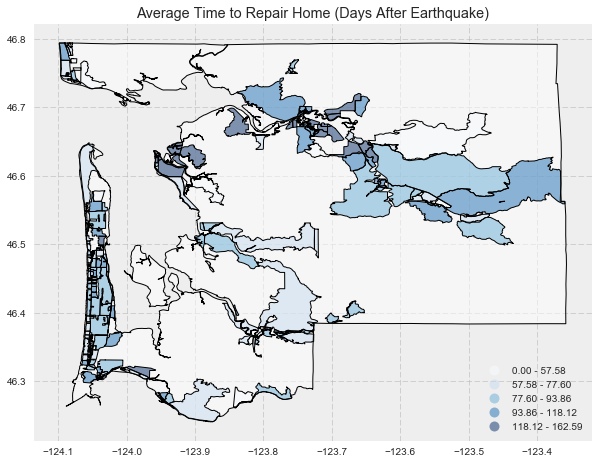

In [565]:
home_get = blocks_pts_mean_joined[['BLOCK_ID','geometry', 'home_get']].dropna(axis=0, how='any')


f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')

county_outline.plot(ax=ax, color = 'white')
home_get.plot(column='home_get', cmap=plt.cm.Blues, scheme='fisher_jenks', legend=True, categorical=False, ax=ax)
# , scheme='fisher_jenks', cmap=plt.cm.Blues, legend=True, categorical=False, ax=ax

ax.set_title('Average Time to Repair Home (Days After Earthquake)')

fname = "../Outputs/" + file_chooser.value + '-map-repair.png'
f.savefig(filename=fname, dpi=150, format='png',
        transparent=False, bbox_inches='tight')

In [566]:
# map = folium.Map(location=(46.464244, -124.047428), tiles='cartodbpositron', zoom_start=12)

In [567]:
# """13
# # add a marker for every record in the filtered data, use a clustered view
# 14
# for each in crimedata[0:MAX_RECORDS].iterrows():
# 15
#     map.simple_marker(
# 16
#         location = [each[1]['Y'],each[1]['X']],
# 17
#         clustered_marker = True)
# """
# #layer = folium.LayerControl().add_to(map)
# marker_cluster = folium.MarkerCluster(name="Households").add_to(map)
# count = 0

# for i in df.iterrows():
#     count += 1
#     ass_wait = i[1].assessment_get - i[1].assessment_put
# #     story = ("{0} recieved inspection {1} days after the event. \n" 
# #              "They filed for an insurance claim of {2}, and recieved the payout {3} days after the event. \n"
# #              "{0} got an engineering assessment at {4}, waiting {5} days. \n"
# #              "They recieved a building permit {6} days after the event."
# #              "Their house was rebuilt {7} days after the earthquake.").format(str(i[1]["name"]).title(),
# #                                                                             i[1].inspection_get,
# #                                                                             i[1].claim_payout,
# #                                                                             i[1].claim_get,
# #                                                                             i[1].assessment_get,
# #                                                                             ass_wait,
# #                                                                             i[1].permit_get,
# #                                                                             i[1].home_get)
#     if i[1].home_get > 365:
#         folium.Marker(location = [i[1].latitude, i[1].longitude],
#                       popup=story, icon=folium.Icon("red")).add_to(marker_cluster)
#     else:
#         folium.Marker(location = [i[1].latitude, i[1].longitude],
#                       popup=story, icon=folium.Icon("green")).add_to(marker_cluster)
#     #print (i[1]["name"])
#     """
#     if count > 150:
#         break
#     else:
#         continue"""
    
# outline = "../Inputs/pacific_county_outline.geojson"

# map.choropleth(geo_path=outline, fill_color = 'red', fill_opacity = .05, line_weight=.5, legend_name="Pacific County")

In [568]:
# blocks2 = pd.DataFrame(blocks['SQ_MILES'].astype(float))
# blocks2['TOT_POP'] = blocks['TOT_POP'].astype(float)
# blocks2['POP_DENS'] = blocks['POP_DENS'].astype(float)
# blocks2['BLOCK_ID'] = blocks['BLOCK_ID'].astype(float)

# blocks_home_get = home_get[~home_get['BLOCK_ID'].isin(blocks['BLOCK_ID'])]

# blocks_json = "/Users/geomando/Dropbox/github/SeaGrantSimulation/Inputs/pacific_county_census_blocks.geojson"
# blocks_json = blocks.to_json()

In [569]:
# map_path = "map.html"
# map.save("../Outputs/{}".format(map_path))

In [570]:
# blocks.set_index('BLOCK_ID', inplace=True)
# home_get.set_index('BLOCK_ID', inplace=True)

In [571]:
# m = map = folium.Map(location=(46.464244, -124.047428), tiles='cartodbpositron', zoom_start=11)

# choro_path = "map1.html"


# m.choropleth(geo_str=test_merge_json, data=test_merge, 
#              columns=['BLOCK_ID', 'home_get'],
#              key_on='features.properties.BLOCK_ID',
#              fill_color='YlGn', fill_opacity=1,
#              legend_name='Square Miles',
#             threshold_scale=[0,25,50,75,100])

# m
# # m.save("../Outputs/{}".format(choro_path))
# # m.save(os.path.join('../Outputs', 'choropleth.html'))

<a href="http://54.214.63.99/map.html">Map!</a>

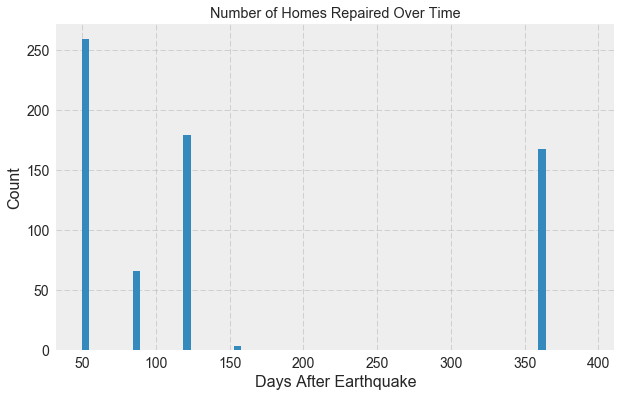

In [581]:
f, ax = plt.subplots(1, figsize=(16, 6))
gdf["home_get"].plot(kind='hist', bins=10, title='Number of Homes Repaired Over Time', figsize=(10,6), fontsize=14)
plt.xlabel('Days After Earthquake', fontsize=16)
plt.ylabel('Count', fontsize=16)

for container in ax.containers:
              plt.setp(container, width=5)

fname = "../Outputs/" + file_chooser.value + '-histogram.png'
f.savefig(filename=fname, dpi=150, format='png',
        transparent=False, bbox_inches='tight')
        

In [573]:
gdf.columns

Index(['Unnamed: 0', 'assessment_get', 'assistance_get', 'claim_get',
       'damage_state', 'damage_state_start', 'damage_value',
       'damage_value_start', 'gave_up_home_search', 'gave_up_money_search',
       'home_get', 'inspection_get', 'latitude', 'loan_get', 'longitude',
       'permit_get', 'story', 'geometry'],
      dtype='object')

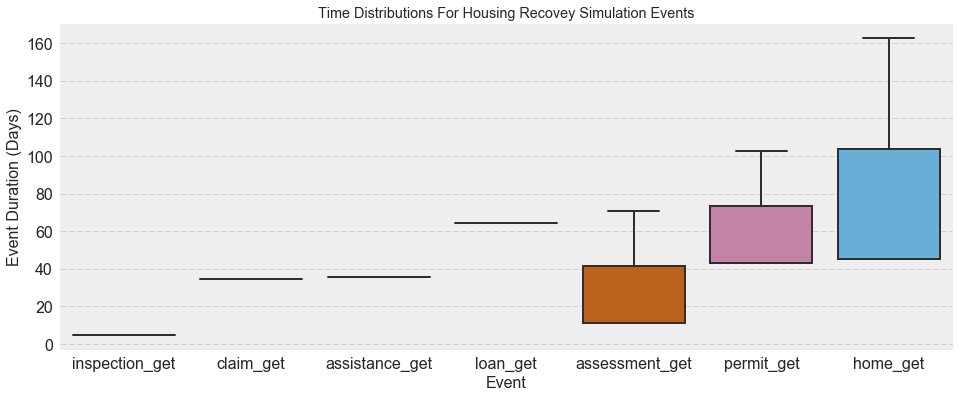

In [574]:
f, ax = plt.subplots(1, figsize=(16, 6))
sns.boxplot(data=gdf[['inspection_get', 'claim_get', 'assistance_get', 'loan_get', 
                      'assessment_get', 'permit_get', 'home_get']], ax=ax)
plt.xlabel('Event', fontsize=16)
plt.ylabel('Event Duration (Days)', fontsize=16)
plt.xticks(fontsize=12)
plt.title('Time Distributions For Housing Recovey Simulation Events')

ax.tick_params(labelsize=16)

fname = "../Outputs/" + file_chooser.value + '-boxplot.png'
f.savefig(filename=fname, dpi=150, format='png',
        transparent=False,bbox_inches='tight')

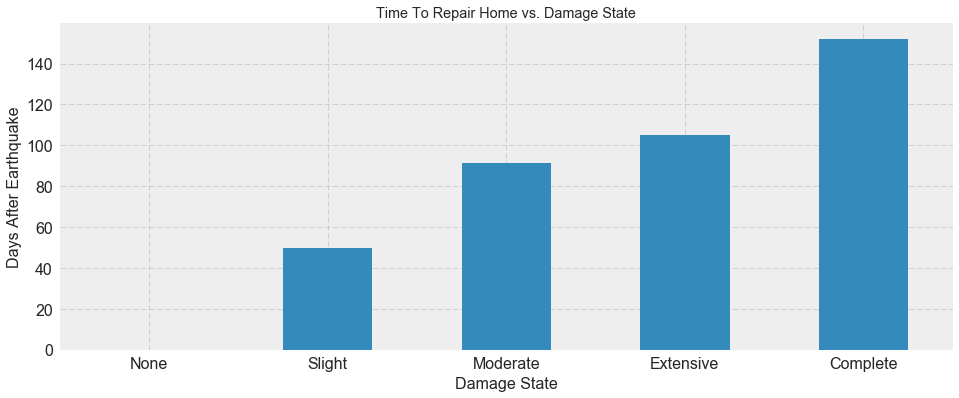

In [575]:
f, ax = plt.subplots(1, figsize=(16, 6))

order = ['None', 'Slight', 'Moderate','Extensive','Complete']

df_damage_state = df[['home_get', 'damage_state_start']].groupby('damage_state_start')

df_damage_state_mean = df_damage_state.mean().ix[order]

df_damage_state_mean.plot(kind='bar', rot=0, legend=False, ax=ax)

plt.xlabel('Damage State', fontsize=16)
plt.ylabel('Days After Earthquake', fontsize=16)
plt.xticks(fontsize=12)
plt.title('Time To Repair Home vs. Damage State')

ax.tick_params(labelsize=16)

fname = "../Outputs/" + file_chooser.value + '-bar-damage.png'
f.savefig(filename=fname, dpi=150, format='png',
        transparent=False,bbox_inches='tight')